In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

In [3]:
raw_data = pd.read_csv('../Week4_data/data.csv')
raw_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,28.0,0,0,8.0500,S
1305,1306,1,1,female,39.0,0,0,108.9000,C
1306,1307,0,3,male,38.5,0,0,7.2500,S
1307,1308,0,3,male,28.0,0,0,8.0500,S


In [4]:
raw_data = raw_data.dropna(axis = 0)
raw_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,male,28.0,0,0,8.0500,S
1305,1306,1,1,female,39.0,0,0,108.9000,C
1306,1307,0,3,male,38.5,0,0,7.2500,S
1307,1308,0,3,male,28.0,0,0,8.0500,S


In [5]:
target = raw_data['Survived']
data = raw_data.drop(columns = 'Survived')

In [6]:
target

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1307, dtype: int64

In [7]:
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,1305,3,male,28.0,0,0,8.0500,S
1305,1306,1,female,39.0,0,0,108.9000,C
1306,1307,3,male,38.5,0,0,7.2500,S
1307,1308,3,male,28.0,0,0,8.0500,S


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
1304,1305,3,1,28.0,0,0,8.0500,2
1305,1306,1,0,39.0,0,0,108.9000,0
1306,1307,3,1,38.5,0,0,7.2500,2
1307,1308,3,1,28.0,0,0,8.0500,2


In [9]:
data = data.drop(columns = 'PassengerId')
target.shape

(1307,)

In [10]:
target = np.array(target).reshape((target.shape[0], 1))

In [11]:
data = np.array(data)

In [12]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size = 0.2)

Q1 Parameters of DecisionTreeClassifier:
- Criterion:
Function to measure the quality of a split, also could be seen as the cost function of decision tree. Three kinds of functions can be chosen from the Classifier: {gini, entropy}
        --1.Gini: Used in CART decision tree algorithm, focusing on whether two random samples belong to one category.
        --2.entropy: Used in ID3, with information gain as its cost function.
- Splitter{best, random}:
Strategy used to choose the split at each node, former choose the best split among all the node, while latter find the best split in a set of random local nodes. In other word, former fit for the dataset which is not so large and the latter fir for those with large dataset
- max_depth(int):
The maximum depth of the tree, usually used in pruning to avoid over-fitting
- min_samples_split(int or float):
The minimum number required to split an internal node. If int is given, then consider it as the minimum number. If float is given, then it is a fraction of the whole samples. It is not recommended to change when data is not so large, default setting 2 is enough for small dataset
- min_samples_leaf(int or float)
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

For more information refer to:
 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=tree

Q2: Different performance on training set and testing set of decision tree with different pruning strategy

First create a cross validation set

In [13]:
cross_X = train_X[int(data.shape[0] * 0.6) : int(data.shape[0] * 0.8)]
cross_y = train_y[int(target.shape[0] * 0.6) : int(target.shape[0] * 0.8)]
train_X_cro = train_X[0 : int(data.shape[0] * 0.6)]
train_y_cro = train_X[0 : int(data.shape[0] * 0.6)]
test_X_cro = test_X
test_y_cro = test_y

In [14]:
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier()

In [15]:
clf.score(test_X_cro, test_y_cro)

0.8320610687022901

In [16]:
import graphviz
from sklearn import tree

def draw_tree(clf):
        dot_data = tree.export_graphviz(clf, out_file = None)
        graph = graphviz.Source(dot_data)

        return graph

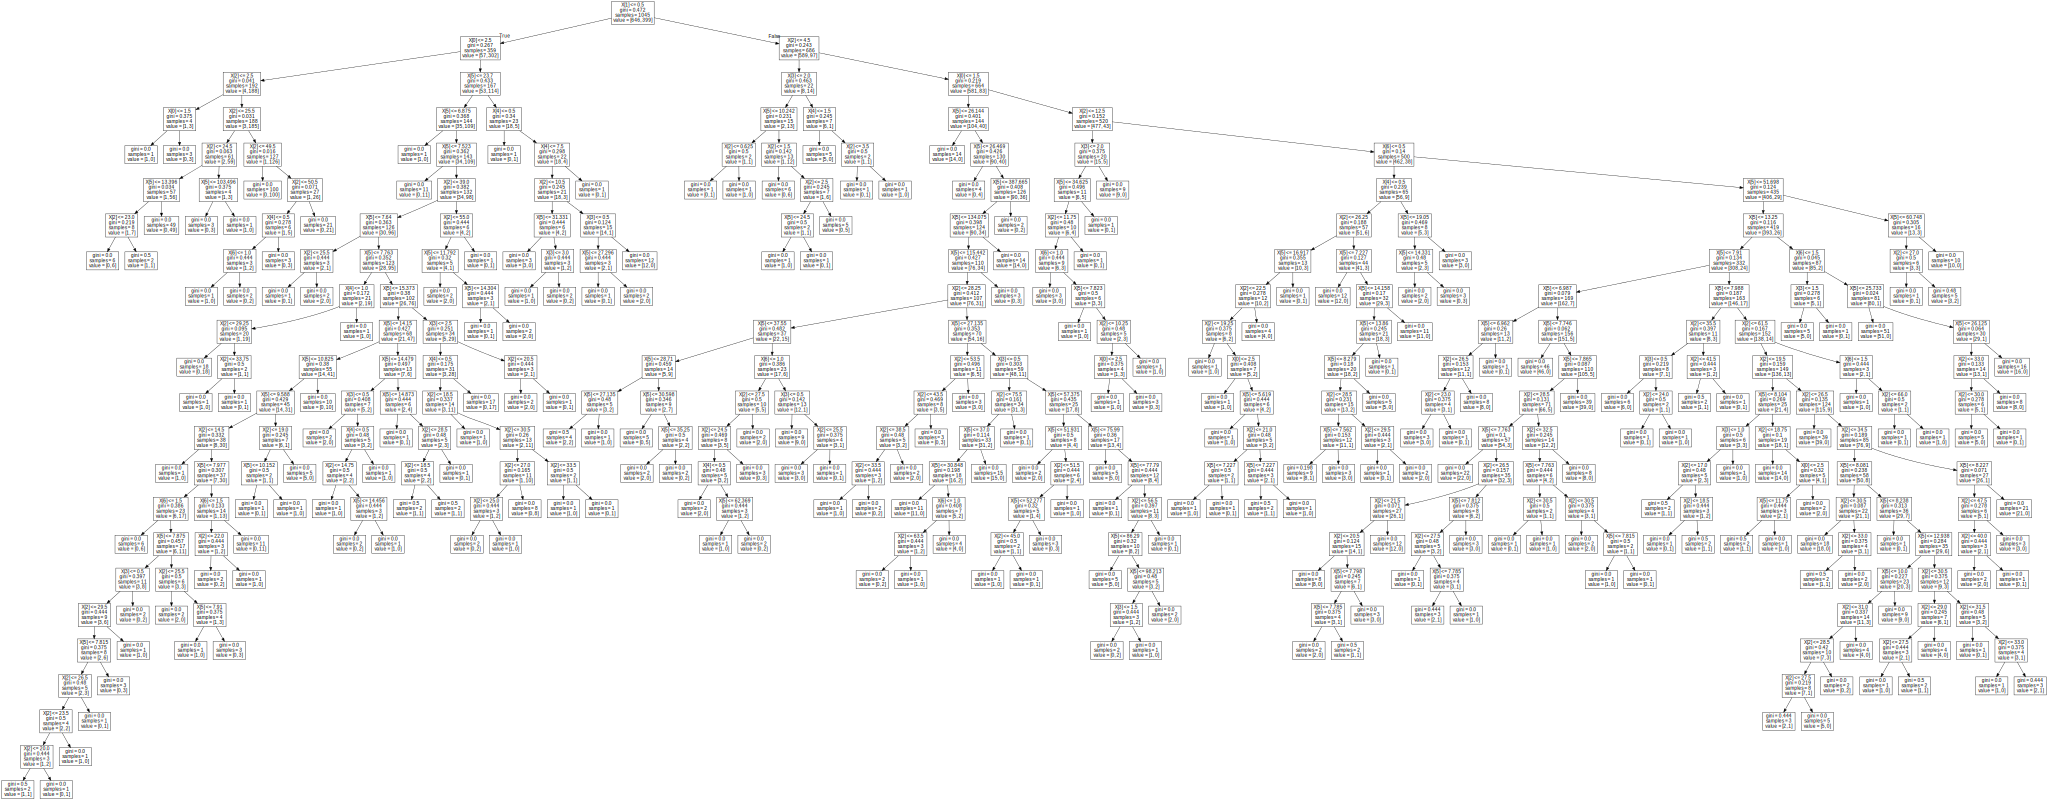

In [17]:
graph = draw_tree(clf)
graph

Q2.1 Change max_depth
Set depth from 3 to 15 to find the best

In [18]:
depth = [i for i in range(3, 25)]

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def depth_f1(train_X, train_y, cross_X, cross_y):
        f1 = []
        f1_train = []
        clf_deep_temp = 0
        best = 0
        best_i = 0

        for i in depth:
                clf_deep_temp = DecisionTreeClassifier(max_depth = i)
                clf_deep_temp.fit(train_X, train_y)
                cross_score = clf_deep_temp.score(cross_X, cross_y)
                train_score = clf_deep_temp.score(train_X, train_y)
                f1.append(cross_score)
                f1_train.append(train_score)
                if best < cross_score:
                        best = cross_score
                        best_i = i
        return f1, f1_train, best_i

In [20]:
f1, f1_train, best = depth_f1(train_X, train_y, cross_X, cross_y)

Text(0.5, 1.0, 'Different performance under different max depth on cross validation set')

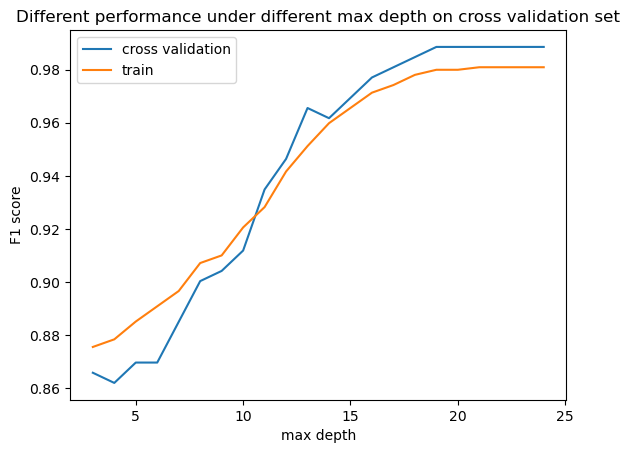

In [21]:
plt.figure()
plt.plot(depth, f1, label = 'cross validation')
plt.plot(depth, f1_train, label = 'train')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('F1 score')
plt.title('Different performance under different max depth on cross validation set')

From above plot, it strange that the model does not demonstrate any over-fitting with the increasing of max depth. For the sake of validation, I choose max depth as 15 which have the best performance on the cross validation set and small enough to reduce the complexity of the decision tree as hyperparameter to check the performance on test set

In [22]:
from sklearn.metrics import classification_report

clf_15 = DecisionTreeClassifier(max_depth = 25)
clf_15.fit(train_X, train_y)
print(f1_score(test_y ,clf_15.predict(test_X)))

0.7761194029850746


F1 score on test set is not as good as it is on cross validation set. The difference between above two experiments is the data, which means the reason might come out from validation set and test set. So check the size of validation and test set

In [23]:
cross_X.shape, test_X.shape

((261, 7), (262, 7))

However, the size of validation set and test set are same. So the problem may occur on the data itself. To solve this issue, KFold is applied to it.

In [24]:
train_X_ = np.row_stack([train_X, cross_X])
train_y_ = np.row_stack([train_y, cross_y])

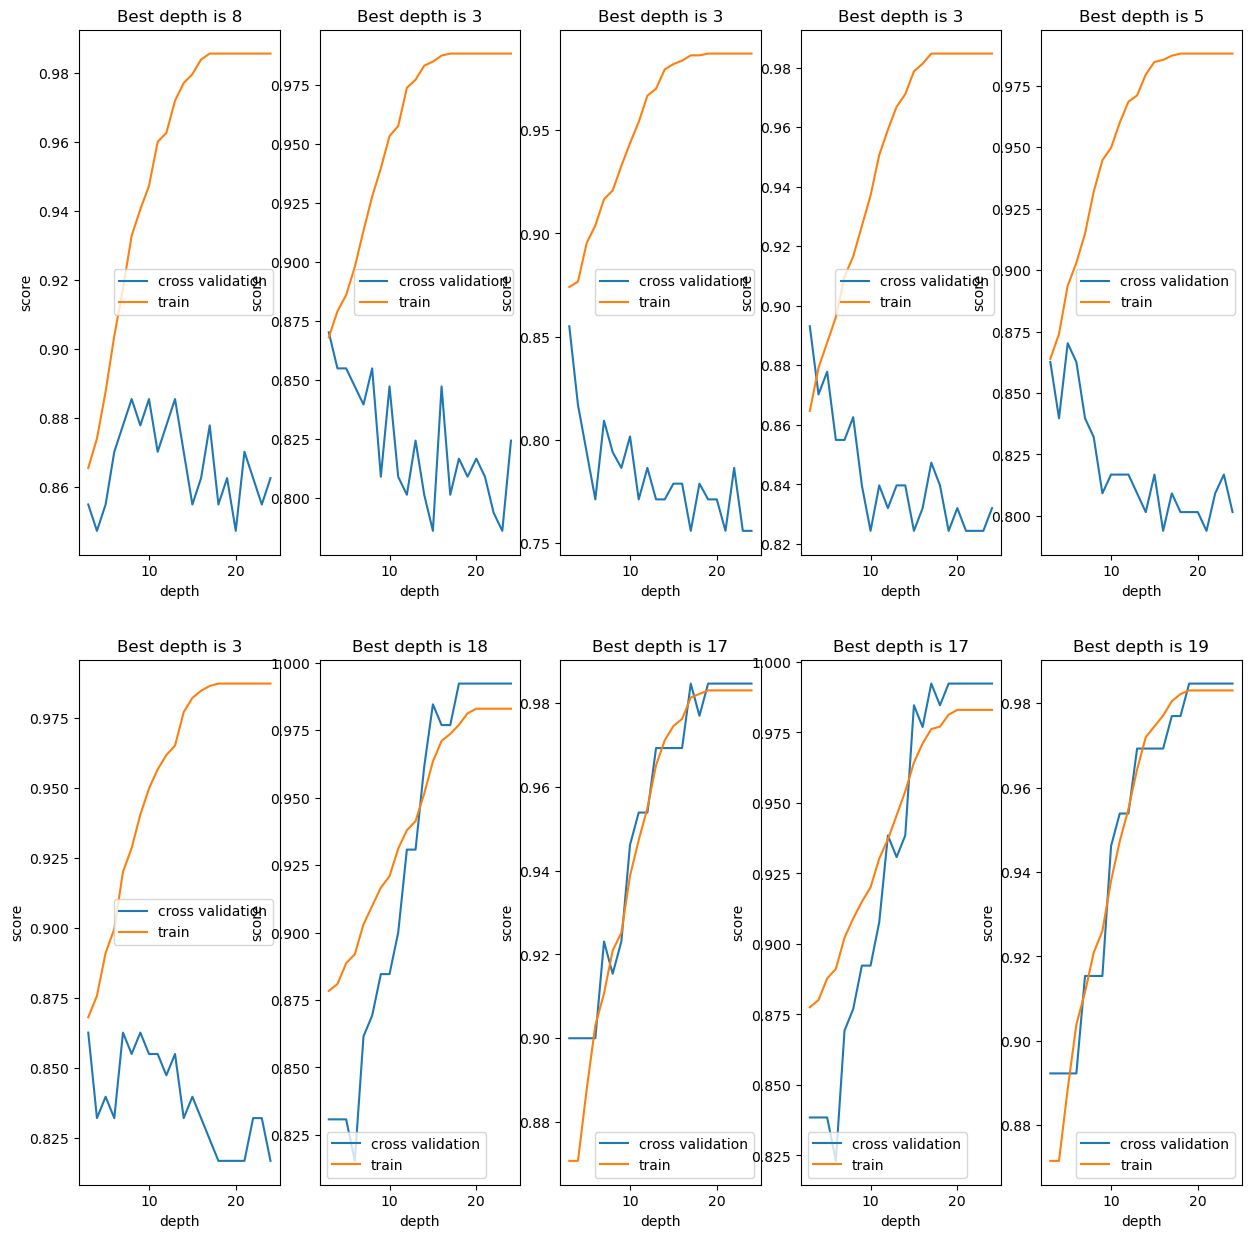

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
i = 1
plt.figure(figsize = (15, 15))

for train_index, test_index in kf.split(train_X_):
        X_train, X_test = train_X_[train_index], train_X_[test_index]
        y_train, y_test = train_y_[train_index], train_y_[test_index]
        f1, f1_train, best = depth_f1(X_train, y_train, X_test, y_test)
        plt.subplot(2, 5, i)
        plt.plot(depth, f1, label = 'cross validation')
        plt.plot(depth, f1_train, label = 'train')
        plt.legend()
        plt.xlabel('depth')
        plt.ylabel('score')
        plt.title(f'Best depth is {best}')
        i += 1
plt.show()

Among all the 10 folds, the best performing depth with the most occurrences is 3. Also, those graph given best performing depth 3 show an expected over-fitting, which score decrease with the increasing value of depth. As a result, the first pruning step is reducing max_depth to 3

In [26]:
clf_depth = DecisionTreeClassifier(max_depth = 3)
clf_depth.fit(train_X, train_y)
score = clf_depth.score(test_X_cro, test_y_cro)
score

0.8664122137404581

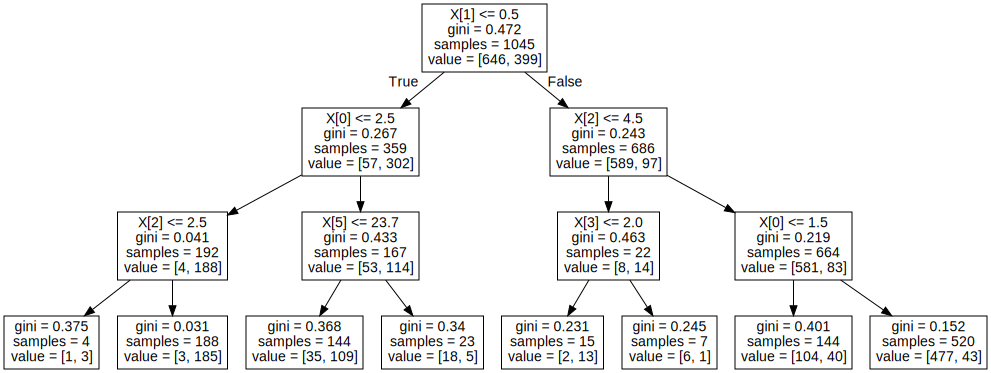

In [27]:
graph_ = draw_tree(clf_depth)
graph_

The tree deleted is shown above

Q3 Performance in same pruning strategy with different criterion

To find out the difference between decision tree using Gini index and Information Gain as its split criterion, I also applied KFold method to train these two types of decision tree 10 time, then plot their corresponding score in each fold to find the gap between two of them.

In [28]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

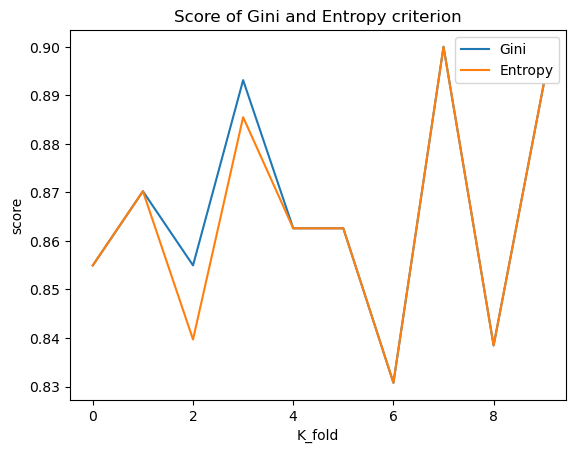

In [29]:
kf_ = KFold(n_splits = 10)
gini = []
entropy = []
j = 1

for train_index, test_index in kf_.split(train_X_):
        X_train, X_test = train_X_[train_index], train_X_[test_index]
        y_train, y_test = train_y_[train_index], train_y_[test_index]
        clf_gini.fit(X_train, y_train)
        clf_entro.fit(X_train, y_train)
        gini_score = clf_gini.score(X_test, y_test)
        entropy_score = clf_entro.score(X_test, y_test)
        gini.append(gini_score)
        entropy.append(entropy_score)

plt.plot(np.arange(10), gini, label = 'Gini')
plt.plot(np.arange(10), entropy, label = 'Entropy')
plt.legend()
plt.xlabel('K_fold')
plt.ylabel('score')
plt.title('Score of Gini and Entropy criterion')
plt.show()

Above graph show that the gap between gini and information gain is small on the result perspective. The only outperform fold is fold 2 and 3, in which gini have a better score than information gain. The implementation detail can refer to my study note which will introduce specifically.